# Implementation of grovers algorithm for two Qubit 

Grovers algorithm is used to find out the position of the the desired object from the set of objects . classically the time complexity is O(n) but in quantum , the time complexity is O(root(n)). ( where n is the number of objects in the set ).


In [1]:
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np


creating a oracle function - oc and converting into a gate . 
oracle is used to rotate the |s> state with respect to |w>


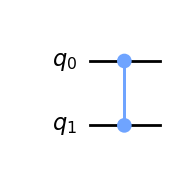

In [2]:
oc= QuantumCircuit(2,name='oc')
oc.cz(0,1)
oc.to_gate()
oc.draw(output='mpl')

In [4]:
backend =Aer.get_backend('statevector_simulator')
gc= QuantumCircuit(2,2)
gc.h([0,1])
gc.append(oc,[0,1])
gc.draw()

┌───┐┌─────┐
q_0: ┤ H ├┤0    ├
     ├───┤│  oc │
q_1: ┤ H ├┤1    ├
     └───┘└─────┘
c: 2/════════════

In [5]:
job = execute(gc, backend )
result= job.result()
sv= result.get_statevector()
np.around(sv)



array([ 1.+0.j,  1.+0.j,  1.+0.j, -1.+0.j])

creating a reflection , where it is a function used to rotate the |s'> with respect to |s> .
reflection is kind of an hadamard sandwich where pauli-x and cz gate lies between the two hadamard layers.

In [6]:
ref = QuantumCircuit(2, name='ref')
ref.h([0,1])
ref.z([0,1])
ref.cz(0,1)
ref.h([0,1])
ref.to_gate()

Instruction(name='ref', num_qubits=2, num_clbits=0, params=[])

In [7]:
ref.draw()

┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤ Z ├─■─┤ H ├
     ├───┤├───┤ │ ├───┤
q_1: ┤ H ├┤ Z ├─■─┤ H ├
     └───┘└───┘   └───┘

Both oracle and reflection will be applied iteratively till it reaches the desired state |w> , let us assume it took r times (operaations) to reach the desired state |w> , then r approximately equals to pi/4 (root(N)) , where N is the number of possible input states .  

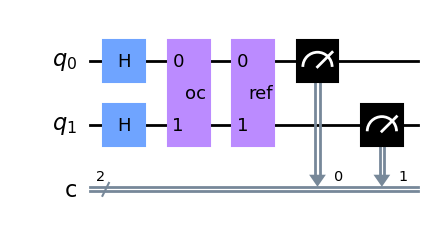

In [10]:
backend = Aer.get_backend('qasm_simulator')
gc.append(ref,[0,1])
gc. measure([0,1],[0,1])
gc.draw(output='mpl')

In [11]:
job = execute(gc, backend ,shots=1)
result= job.result()
counts= result.get_counts()
print(counts)

{'11': 1}
